<a href="https://colab.research.google.com/github/UrviSoni/pytorch_deeplearning/blob/master/Training_the_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import optim
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5)),])
# Download the load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)



In [2]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),nn.ReLU(),nn.Linear(128, 64),nn.ReLU(),nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Optimizers requires the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.001)

print('Initial Weights -', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because Gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)



Initial Weights - Parameter containing:
tensor([[ 0.0026,  0.0075, -0.0196,  ..., -0.0330,  0.0156, -0.0001],
        [ 0.0243,  0.0248,  0.0156,  ..., -0.0249,  0.0334,  0.0192],
        [ 0.0038,  0.0325, -0.0016,  ..., -0.0127, -0.0063,  0.0032],
        ...,
        [-0.0254, -0.0277, -0.0172,  ...,  0.0266,  0.0241,  0.0181],
        [-0.0117,  0.0137,  0.0110,  ...,  0.0148,  0.0277,  0.0240],
        [-0.0241,  0.0302, -0.0020,  ..., -0.0258, -0.0096, -0.0017]],
       requires_grad=True)
Gradient - tensor([[ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [-0.0052, -0.0052, -0.0052,  ..., -0.0052, -0.0052, -0.0052],
        ...,
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002]])


In [3]:
# Take an update step and few the new weights
optimizer.step()
print('Updates weights -', model[0].weight)

Updates weights - Parameter containing:
tensor([[ 0.0026,  0.0075, -0.0196,  ..., -0.0330,  0.0156, -0.0001],
        [ 0.0243,  0.0248,  0.0156,  ..., -0.0249,  0.0334,  0.0192],
        [ 0.0038,  0.0325, -0.0016,  ..., -0.0127, -0.0063,  0.0032],
        ...,
        [-0.0254, -0.0277, -0.0172,  ...,  0.0266,  0.0241,  0.0181],
        [-0.0117,  0.0137,  0.0110,  ...,  0.0148,  0.0277,  0.0240],
        [-0.0241,  0.0302, -0.0020,  ..., -0.0258, -0.0096, -0.0017]],
       requires_grad=True)


In [4]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    #Faltten MNIST images into a 784 long vector
    images = images.view(images.shape[0], -1)
    
    # TODO: Training pass
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 1.8516166826555216
Training loss: 0.8007913245829438
Training loss: 0.5165269206137036
Training loss: 0.4309543612828133
Training loss: 0.38809249812224783


In [5]:
 !wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2018-12-19 09:41:22--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [6]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2018-12-19 09:41:25--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



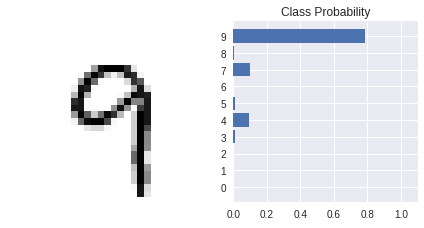

In [7]:
%matplotlib inline
import sys
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off Gradient to speed up this part
with torch.no_grad():
  logits = model.forward(img)
  
# Output of the network are logits, need to take softmax for prababilities
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps)